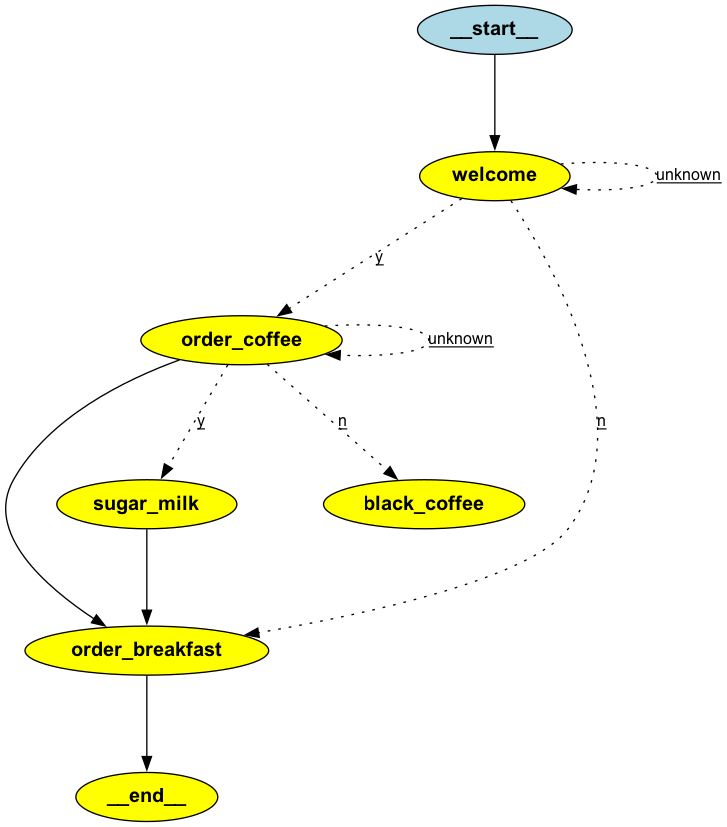

In [4]:
from langgraph.graph import StateGraph, END
from typing import TypedDict, Annotated
import operator
from IPython.display import Image
from langchain_core.messages import AnyMessage, SystemMessage, HumanMessage, ToolMessage
from langchain_openai import ChatOpenAI

class AgentState(TypedDict):
    messages: Annotated[list[AnyMessage], operator.add]
      
def welcome(state: AgentState):
    answer = input("welcome, would you like to order some coffee? (y/n)")
    return { "messages": [answer] }

def decide_drink(state: AgentState):
    answer = state["messages"][-1]
    return  { "y": "y", "n": "n"}.get(answer, "unknown")

def decide_coffee(state: AgentState):
    answer = state["messages"][-1]
    return  { "y": "y", "n": "n"}.get(answer, "unknown")

def sugar_milk(state: AgentState):
    print("ok, I will bring you sugar and milk")

def black_coffee(state: AgentState):
    print("ok, I will bring you black coffee")

def order_coffee(state: AgentState):
    answer = input("Do you like to have sugar and milk? (y/n)")
    return { "messages": [answer] }

def order_breakfast(state: AgentState):
    answer = input("What do you like?")
    return { "messages": [answer] }
  
  
########

graph = StateGraph(AgentState)
graph.add_node("welcome", welcome) 
graph.add_node("order_coffee", order_coffee)
graph.add_node("order_breakfast", order_breakfast)
graph.add_conditional_edges(
    "welcome", 
    decide_drink,
    { "y": order_coffee.__name__, "n": order_breakfast.__name__, "unknown": welcome.__name__ }
)

graph.add_conditional_edges(
    "order_coffee", 
    decide_coffee,
    { "y": sugar_milk.__name__, "n": black_coffee.__name__, "unknown": order_coffee.__name__ }
)

graph.add_node("sugar_milk", sugar_milk)
graph.add_node("black_coffee", black_coffee)
graph.add_edge("sugar_milk", "order_breakfast")
graph.add_edge("order_coffee", "order_breakfast")
graph.add_edge("order_breakfast", END)
graph.set_entry_point("welcome")

graph = graph.compile()
Image(graph.get_graph().draw_png())

In [5]:
graph.invoke({"messages": []})

welcome, would you like to order some coffee? (y/n) n
What do you like? benedict


{'messages': ['n', 'benedict']}